In [19]:
import json
import matplotlib.pyplot as plt
from statistics import mean, variance
import numpy as np
import re

from kp.utils.constants import EXPERIMENTS_DIR

In [76]:
EXPERIMENT_NAME = "Fake Movies, Real Actors (Full Patch)"
EXPERIMENT_DIR = re.sub(r"[^\w]", "_", EXPERIMENT_NAME).lower().replace("__","_").rstrip("_")
RESULTS_DIR = EXPERIMENTS_DIR / EXPERIMENT_DIR
FIGURES_DIR = RESULTS_DIR / "figures"
FIGURES_DIR.mkdir(exist_ok=True)
results_paths = RESULTS_DIR.rglob("*.json")

In [77]:
TOP_K = 150
forgotten_tokens = {}
results = []
for results_path in results_paths:
    with open(results_path, "r") as f:
        data = json.load(f)

    dropout_rate = data["experiment_settings"]["patch_dropout"]

    target_probs = [
        ex["target"]["token_prob"]
        for ex in data["results"]
        if "target" in ex and "token_prob" in ex["target"]
    ]

    # TODO: Set this up with some sort of top k setup
    accuracy = [
        int(ex["target"]["token_idx"] == ex["top_predictions"][0]["token_id"])
        for ex in data["results"]
    ]

    avg_prob = mean(target_probs)
    avg_accuracy = mean(accuracy)
    var_prob = variance(target_probs)

    results.append({
        "dropout_rate": dropout_rate,
        "avg_prob": avg_prob,
        "var_prob": var_prob,
        "avg_accuracy": avg_accuracy,
    })

    lowest_k = sorted(data["results"], key=lambda ex: ex["target"]["token_prob"])[:TOP_K]

    forgotten_tokens[dropout_rate] = lowest_k


In [78]:
for res in forgotten_tokens[0]:
    print(res["target"]["token_prob"])
    print(res["dropout"])

1.2946264060786916e-09
{'layers': []}
4.987311399418104e-07
{'layers': []}
1.265475134459848e-06
{'layers': []}
4.084722149855224e-06
{'layers': []}
4.349712071416434e-06
{'layers': []}
6.82636482451926e-06
{'layers': []}
1.299758969253162e-05
{'layers': []}
3.823585939244367e-05
{'layers': []}
5.379626963986084e-05
{'layers': []}
5.848160435562022e-05
{'layers': []}
6.366211164277047e-05
{'layers': []}
6.450905493693426e-05
{'layers': []}
7.28749146219343e-05
{'layers': []}
9.279455844080076e-05
{'layers': []}
0.00011194922990398481
{'layers': []}
0.00017763467621989548
{'layers': []}
0.00018759717931970954
{'layers': []}
0.00038221004069782794
{'layers': []}
0.0004195026704110205
{'layers': []}
0.00042096138349734247
{'layers': []}
0.0004922377411276102
{'layers': []}
0.0005549056804738939
{'layers': []}
0.0006515681743621826
{'layers': []}
0.0007525165565311909
{'layers': []}
0.0008503374992869794
{'layers': []}
0.0009065369376912713
{'layers': []}
0.0012096274876967072
{'layers': [

In [13]:
dropout_rates = [r["dropout_rate"] for r in results]
avg_probs = [r["avg_prob"] for r in results]
std_devs = [np.sqrt(r["var_prob"]) for r in results]  # std = sqrt(variance)
avg_accuracies = [r["avg_accuracy"] for r in results]

sorted_data = sorted(zip(dropout_rates, avg_probs, std_devs, avg_accuracies))
x, y, yerr, z = zip(*sorted_data)

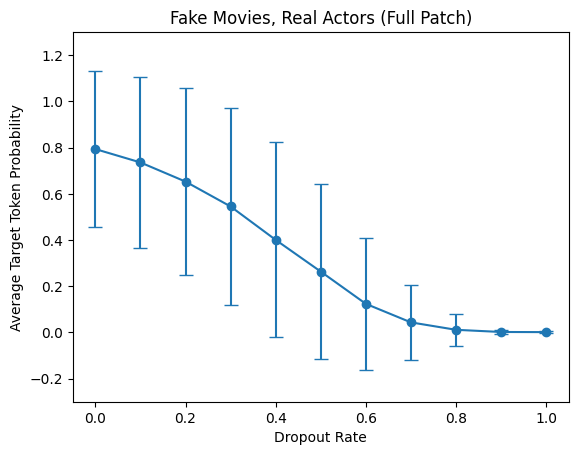

In [26]:
plt.errorbar(x, y, yerr=yerr, fmt='o-', capsize=5)
plt.xlabel("Dropout Rate")
plt.ylabel("Average Target Token Probability")
plt.title(EXPERIMENT_NAME)
plt.ylim(-0.3, 1.3)
plt.savefig(FIGURES_DIR / "dropout_vs_prob.png", dpi=300, bbox_inches="tight")
plt.show()

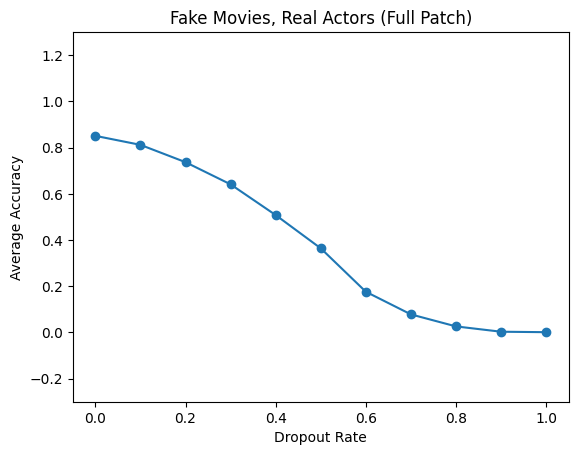

In [27]:
plt.errorbar(x, z, fmt='o-', capsize=5)
plt.xlabel("Dropout Rate")
plt.ylabel("Average Accuracy")
plt.title(EXPERIMENT_NAME)
plt.ylim(-0.3, 1.3)
plt.savefig(FIGURES_DIR / "dropout_vs_accuracy.png", dpi=300, bbox_inches="tight")
plt.show()